In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bucket import create_bucket_synopsis
from lloyd import lloyd_with_weights, lloyd
from util import normalise

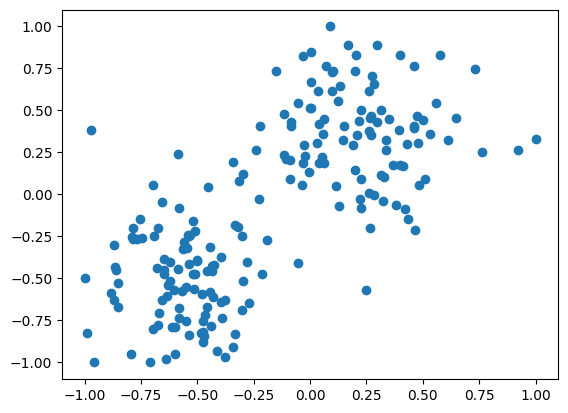

In [2]:
data1 = np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=100)
df1 = pd.DataFrame(data1)
data2 = np.random.multivariate_normal(mean=[4,4], cov=[[1,0],[0,1]], size=100)
df2 = pd.DataFrame(data2)
df = normalise(pd.concat([df1, df2]))
plt.scatter(x=df[0], y=df[1])

In [4]:
weighted_points = create_bucket_synopsis(df, e=10, d=2, branching_threshold = 5, max_depth = 10, data_bound=1)

Leaves
[(           0         1
16  0.116266  0.047771
33  0.411936  0.170404
46  0.399449  0.177086
47  0.367736  0.174160
83  0.227970  0.091123, np.float64(11.777557361539596)), (           0         1
13  0.421969 -0.087543
18  0.219491 -0.029168
24  0.323303 -0.041361
78  0.383198 -0.062804, np.float64(8.130895595980988)), (           0         1
8   0.282532 -0.005142
15  0.510915  0.095032
29  0.263330  0.010277
39  0.482123  0.055723, np.float64(10.706964858044238)), (           0         1
7   0.924278  0.264192
22  0.312373  0.114625
25  0.328193  0.101962
55  0.762968  0.255161
85  1.000000  0.329423, np.float64(12.284333043483237)), (           0         1
1   0.225826 -0.079237
37  0.466114 -0.210085
86  0.433970 -0.144638, np.float64(3.451794719481358)), (           0         1
57  0.126476 -0.069698, np.float64(2.9632334103631783)), (           0         1
5   0.248689 -0.569583
53  0.266384 -0.197735, np.float64(2.4625752888511867)), (           0         1
3  -0.296492

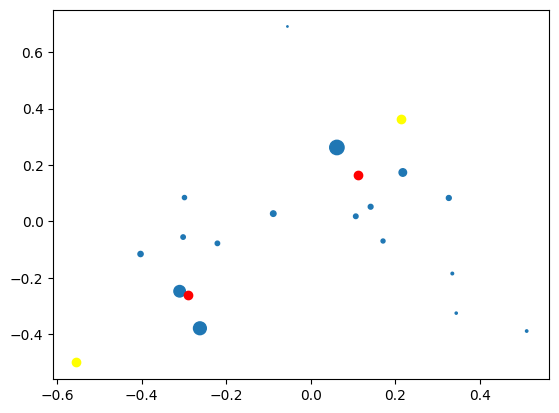

In [17]:
centers = pd.DataFrame(lloyd_with_weights(k=2, X=weighted_points.iloc[:, :2], weights=weighted_points[2], n_iter=10))
real_centers = pd.DataFrame(lloyd(k=2, X=df, n_iter=10))
plt.scatter(x=weighted_points[0], y=weighted_points[1], s=weighted_points[2])
plt.scatter(x=centers[0], y=centers[1], color="red")
plt.scatter(x=real_centers[0], y=real_centers[1], color="yellow")

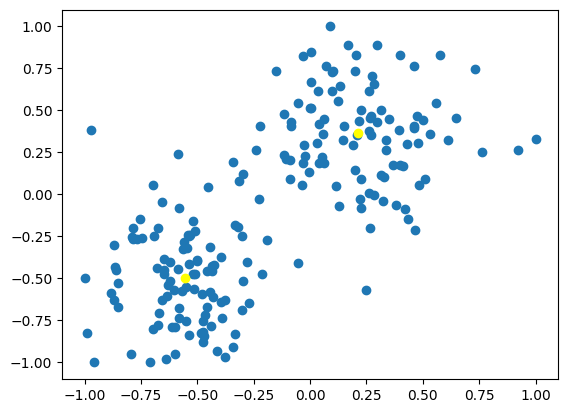

In [16]:
real_centers = pd.DataFrame(lloyd(k=2, X=df, n_iter=10))
plt.scatter(x=df[0], y=df[1])
plt.scatter(x=real_centers[0], y=real_centers[1], color="yellow")

### How to choose branching_threshold and max_depth? 

- max_depth would be proportional to the log of the branching threshold

- guess would be it depends on the data: can we do some experiments?

In [ ]:
def 